# Problems

---
### System of linear equations
1. Solve the system of linear equations, look into documentation of Numpy so you don't have to reinvent the wheel. System can be, for example:
$$
2x + 3y = 5\\
7x + 4y = 6
$$

2. Plot the two lines and their intersection as a check.


In [ ]:
import numpy as np

# Coefficient matrix A
A = np.array([[2, 3], [7, 4]])

# Right-hand side vector b
b = np.array([5, 6])

# Solve for x
sol = np.linalg.solve(A, b)
print(sol)

[-0.15384615  1.76923077]


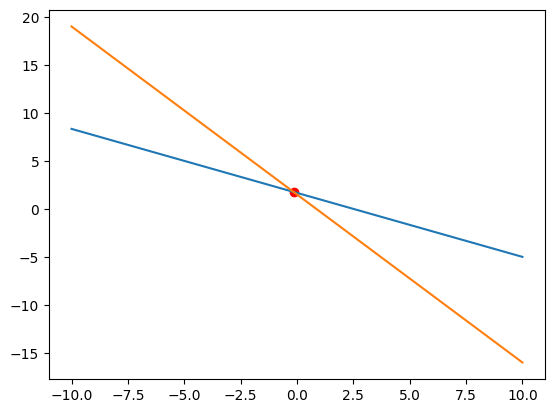

In [12]:
x = np.linspace(-10, 10, 400)
y = (5 - 2*x)/3
y2 = (6 - 7*x)/4
plt.plot(x, y)
plt.plot(x, y2)
plt.scatter(sol[0],sol[1], color='red')
plt.show()

---
### Complexity of sorting

Searching in a list (of length N) has a linear complexity (O(N)), but sorting is numerically more difficult. Even though when we know the list will be searched repeatedly, it is worth sorting it first. The complexities are as follows:
</div>

<table>
  <tr>
    <th style="text-align: right;">Operation</th> <th style="text-align: left;">Complexity</th>
  </tr>
  <tr>
    <td style="text-align: right;">Searching a list</td> <td style="text-align: left;">O(n)</td>
  </tr>
  <tr>
    <td style="text-align: right;">Sorting a list</td> <td style="text-align: left;">O(n log n)</td>
  </tr>
  <tr>
    <td style="text-align: right;">Searching a sorted list</td> <td style="text-align: left;">O(log n)</td>
  </tr>
</table>

1. Use `numpy` to generate random sequence of numbers and sequence of decreasing numbers with random step, minimal and maximal step choice is up to you. Here is docstring for the second function:
```python
def generate_decreasing_sequence(n: int, start=10, step_low=1, step_high=5) -> np.ndarray: 
    """Generates a decreasing sequence of length `n` starting from `start` with random steps.
        >>> np.random.seed(42)
        >>> generate_decreasing_sequence(5, start=10, step_low=1, step_high=3)
        array([10,  7,  6,  3,  0])
    """
```
2. Visualize the performance of different sorting algorithms of `numpy.sort()` (see the [documentation](https://numpy.org/doc/stable/reference/generated/numpy.sort.html)). Good visualization is to plot a dependence $time=time(N)$, where $N$ is the length of the array and $time$ is the time needed to sort the array. Time can be measured using 
```python
import time
start_time = time.perf_counter()
# your code for sorting
end_time = time.perf_counter()
time_total = end_time - start_time
```
3. Average the time needed to sort array over many random sequences of numbers.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

def generate_random_sequence(n: int, low=0, high=100) -> np.ndarray:
    """Generates a numpy array of `n` random numbers from `low` to `high`."""
    return np.random.uniform(low, high, n)

def generate_decreasing_sequence(n: int, start=10, step_low=1, step_high=5) -> np.ndarray: 
    """Generates a decreasing sequence of length `n` starting from `start` with random steps.
        >>> np.random.seed(42)
        >>> generate_decreasing_sequence(5, start=10, step_low=1, step_high=3)
        array([10,  7,  6,  3,  0])
    """
    seq = [start]
    for _ in range(n - 1):
        step = np.random.randint(step_low, step_high + 1)
        seq.append(seq[-1] - step)
    return np.array(seq)

def time_sort(array: np.ndarray, kind: str) -> float:
    """
    Measure the time (in seconds) required to sort an array using numpy.sort with a specified algorithm.
    
    Parameters:
        array (np.ndarray): The array to be sorted.
        kind (str): Sorting algorithm to use. Options are 'quicksort', 'mergesort', 'heapsort', 'stable'.
    """
    start_time = time.perf_counter()
    np.sort(array, kind=kind)
    end_time = time.perf_counter()
    return end_time - start_time

def average_sort_time(n, kind='quicksort', num_trials=5, array_generator: callable=generate_random_sequence) -> float:
    """
    Compute the average time required to sort an array of length n over a given number of trials.
    
    Parameters:
        n (int): Length of the array.
        kind (str): Sorting algorithm to use.
        num_trials (int): Number of trials over which to average the sorting time.
        array_generator (callable): Function used to generate the array.
        
    Returns:
        float: Average sorting time in seconds.
        
    Examples:
        >>> avg_time = average_sort_time(10, kind='quicksort', num_trials=3, array_generator=lambda n: np.arange(n))
        >>> avg_time >= 0
        True
    """
    times = []
    for _ in range(num_trials):
        arr = array_generator(n)
        t = time_sort(arr, kind)
        times.append(t)
    return np.mean(times)

def plot_sorting_performance(sizes, kinds=('quicksort', 'mergesort', 'heapsort', 'stable'), 
                             num_trials=5, array_generator=generate_random_sequence):
    """
    Plot the average sorting time as a function of the array length for different sorting algorithms.
    
    For each algorithm in `kinds` and each size in `sizes`, the function computes the average sorting time 
    over `num_trials` and then creates a plot comparing the performance.
    
    Parameters:
        sizes (list or array-like): List of array sizes (N) for which to measure performance.
        kinds (tuple): A tuple of strings specifying the sorting algorithms to compare.
        num_trials (int): Number of trials for averaging sort times.
        array_generator (callable): Function to generate the test arrays.
    
    Returns:
        None. Displays a matplotlib plot.
    
    Examples:
        plot_sorting_performance([100, 1000, 5000], kinds=('quicksort',), num_trials=2)
    """
    plt.figure(figsize=(10, 6))
    for kind in kinds:
        avg_times = []
        for n in sizes:
            avg_time = average_sort_time(n, kind=kind, num_trials=num_trials, array_generator=array_generator)
            avg_times.append(avg_time)
        plt.scatter(sizes, avg_times, label=kind)
    
    plt.xlabel('Array Length (N)')
    plt.ylabel('Average Sorting Time (seconds)')
    plt.title('Sorting Performance for Different Algorithms')
    plt.legend()
    plt.show()


import doctest
doctest.testmod()

TestResults(failed=0, attempted=4)

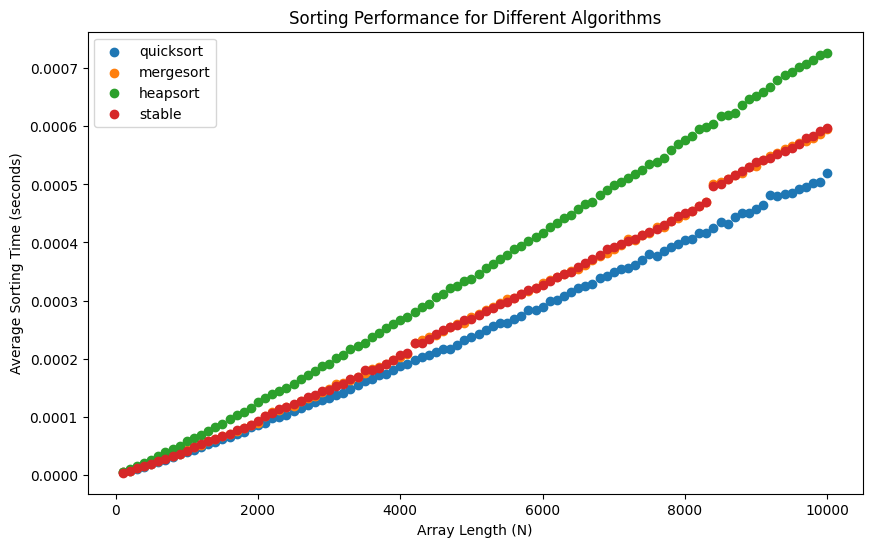

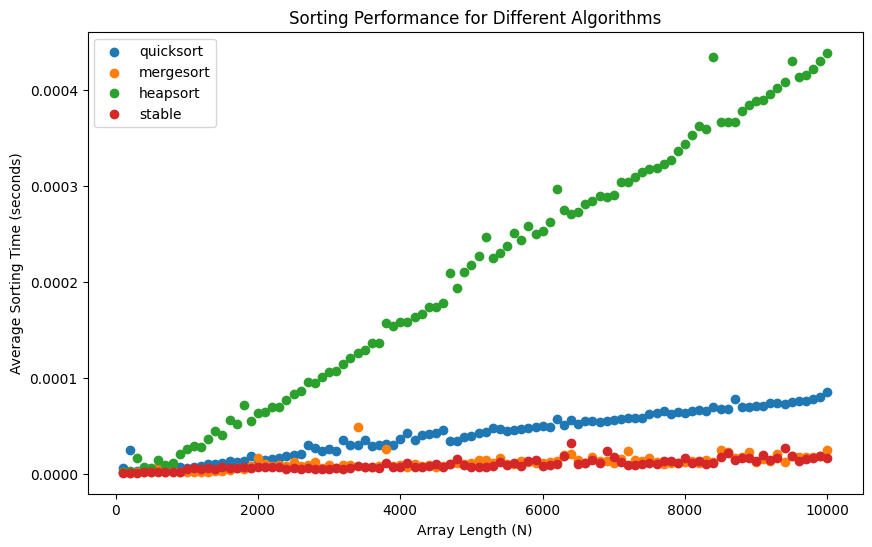

In [2]:
sizes = np.linspace(100, 10000, 100, dtype=int)
kinds = ('quicksort', 'mergesort', 'heapsort', 'stable')
num_trials = 50
plot_sorting_performance(sizes, kinds=kinds, num_trials=num_trials, array_generator=generate_random_sequence)
plot_sorting_performance(sizes, kinds=kinds, num_trials=num_trials, array_generator=generate_decreasing_sequence)

---
### Random matrix
Generate a random matrix and 
1. show the histogram of real parts of its eigenvalues using,
2. visualize eigenvalues in the complex plane as scatterplot.

*What you get is a fun property of random matrices.*

In [2]:
import numpy as np
import matplotlib.pyplot as plt

a = np.random.random((5000, 5000))
eigs = np.linalg.eigvals(a)

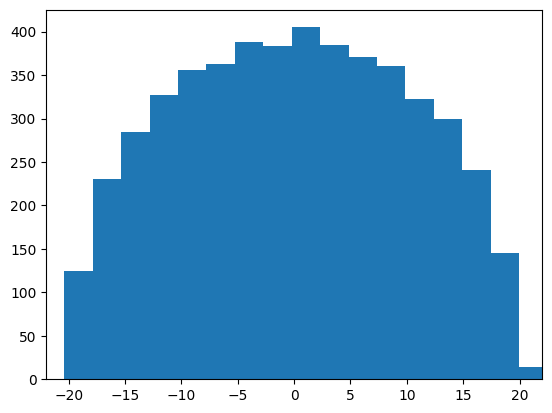

In [3]:
plt.hist(eigs.real, bins=1000)
plt.xlim(-22, 22)
plt.show()

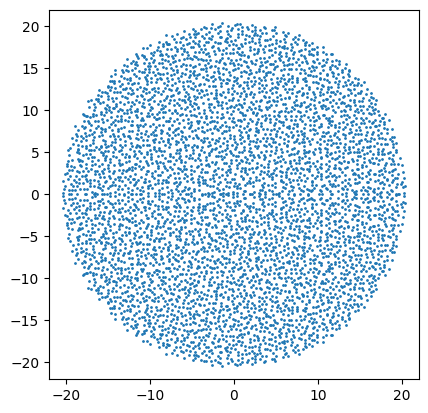

In [4]:
zoom = 22
plt.scatter(eigs.real,eigs.imag, s=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-zoom, zoom)
plt.ylim(-zoom, zoom)
plt.show()

# Problematic problems
---
### Climate change
Find real world data on Climate change (there are packages for that) and visualize it. Perform analysis using Numpy. This can include averaging over time, uncertainty analysis, etc.
